https://lmfit.github.io/lmfit-py/builtin_models.html

In [79]:
import numpy as np
from lmfit.models import GaussianModel,LorentzianModel,VoigtModel
import matplotlib.pyplot as plt

# Directly use build-in models

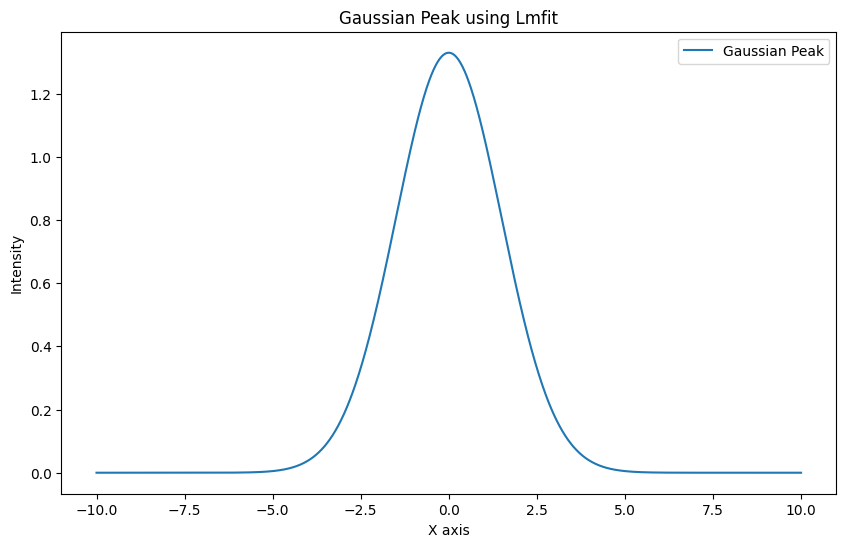

In [80]:
# 参数设置
x = np.linspace(-10, 10, 1000)
center = 0
sigma = 1.5  # 标准差
amplitude = 5  # 峰值高度

# 创建GaussianModel实例
model = GaussianModel()

# 创建参数对象并设置值
params = model.make_params(center=center, sigma=sigma, amplitude=amplitude)

# 计算高斯函数
gaussian_curve = model.eval(params=params, x=x)

# 绘制高斯峰
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian_curve, label='Gaussian Peak')
plt.xlabel('X axis')
plt.ylabel('Intensity')
plt.title('Gaussian Peak using Lmfit')
plt.legend()
plt.show()

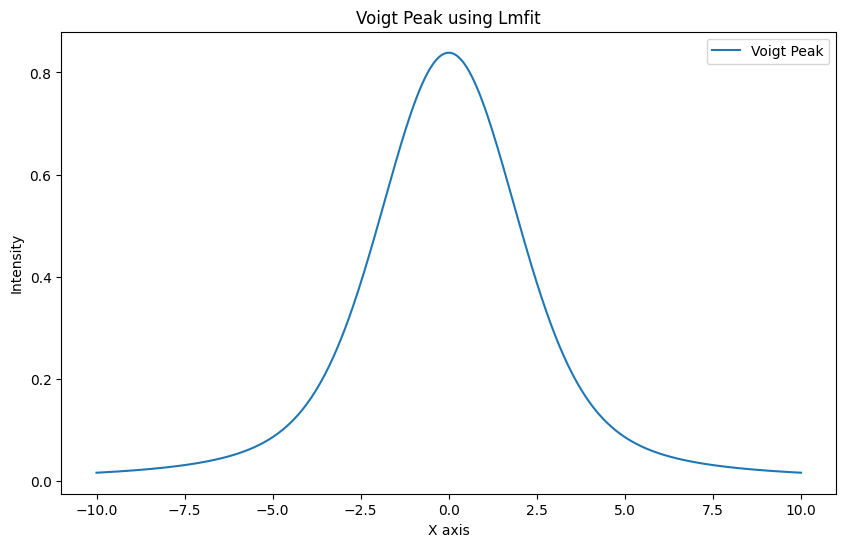

In [81]:
# 参数设置
x = np.linspace(-10, 10, 1000)
model = VoigtModel()
# print(model.param_names)
params = model.make_params(center=center, sigma=sigma, amplitude=amplitude, gamma = 1)
voigt = model.eval(params=params, x=x)

# 绘制高斯峰
plt.figure(figsize=(10, 6))
plt.plot(x, voigt, label='Voigt Peak')
plt.xlabel('X axis')
plt.ylabel('Intensity')
plt.title('Voigt Peak using Lmfit')
plt.legend()
plt.show()

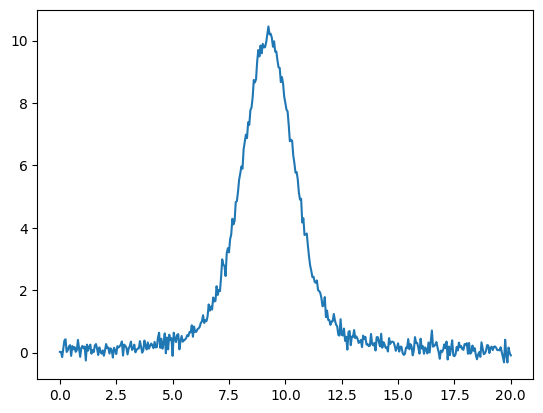

In [82]:
from numpy import loadtxt

data = loadtxt('test_peak.dat')
x = data[:, 0]
y = data[:, 1]

plt.plot(x,y)
plt.show()

In [85]:
mod = GaussianModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

out.params['center'].value

print(out.fit_report(min_correl=0.25))
# print(type(out.params))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 401
    # variables        = 3
    chi-square         = 29.9943157
    reduced chi-square = 0.07536260
    Akaike info crit   = -1033.77437
    Bayesian info crit = -1021.79248
    R-squared          = 0.99045513
[[Variables]]
    amplitude:  30.3135789 +/- 0.15712752 (0.52%) (init = 43.62238)
    center:     9.24277046 +/- 0.00737497 (0.08%) (init = 9.25)
    sigma:      1.23218496 +/- 0.00737506 (0.60%) (init = 1.35)
    fwhm:       2.90157379 +/- 0.01736695 (0.60%) == '2.3548200*sigma'
    height:     9.81457271 +/- 0.05087308 (0.52%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) = +0.5774


In [84]:
from lmfit.models import LorentzianModel
mod = LorentzianModel()
pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 401
    # variables        = 3
    chi-square         = 53.7535387
    reduced chi-square = 0.13505914
    Akaike info crit   = -799.830322
    Bayesian info crit = -787.848438
    R-squared          = 0.98289441
[[Variables]]
    amplitude:  38.9726380 +/- 0.31386754 (0.81%) (init = 54.52798)
    center:     9.24439393 +/- 0.00927645 (0.10%) (init = 9.25)
    sigma:      1.15483177 +/- 0.01315708 (1.14%) (init = 1.35)
    fwhm:       2.30966354 +/- 0.02631416 (1.14%) == '2.0000000*sigma'
    height:     10.7421504 +/- 0.08634317 (0.80%) == '0.3183099*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) = +0.7087


In [16]:
from lmfit.models import VoigtModel

mod = VoigtModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 401
    # variables        = 3
    chi-square         = 14.5448627
    reduced chi-square = 0.03654488
    Akaike info crit   = -1324.00615
    Bayesian info crit = -1312.02427
    R-squared          = 0.99537150
[[Variables]]
    amplitude:  35.7553799 +/- 0.13861559 (0.39%) (init = 65.43358)
    center:     9.24411179 +/- 0.00505496 (0.05%) (init = 9.25)
    sigma:      0.73015485 +/- 0.00368473 (0.50%) (init = 0.8775)
    gamma:      0.73015485 +/- 0.00368473 (0.50%) == 'sigma'
    fwhm:       2.62949983 +/- 0.01326979 (0.50%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     10.2204068 +/- 0.03959933 (0.39%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*real(wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))))'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) = +0.6513


In [18]:
mod = VoigtModel()

pars = mod.guess(y, x=x)
pars['gamma'].set(value=0.7, vary=True, expr='')
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))
print(mod.param_names)

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 401
    # variables        = 4
    chi-square         = 10.9301767
    reduced chi-square = 0.02753193
    Akaike info crit   = -1436.57602
    Bayesian info crit = -1420.60017
    R-squared          = 0.99652177
[[Variables]]
    amplitude:  34.1914716 +/- 0.17946974 (0.52%) (init = 65.43358)
    center:     9.24374846 +/- 0.00441904 (0.05%) (init = 9.25)
    sigma:      0.89518951 +/- 0.01415479 (1.58%) (init = 0.8775)
    gamma:      0.52540156 +/- 0.01857994 (3.54%) (init = 0.7)
    fwhm:       2.72573678 +/- 0.01363994 (0.50%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     10.0872197 +/- 0.03482126 (0.35%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*real(wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))))'
[[Correlations]] (unreported correlations are < 0.250)
    C(sigma, gamma)     = -0.9285
    C(amplitude, gamma) = +0.8210


mutilpeak

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 250
    # variables        = 8
    chi-square         = 1247.52821
    reduced chi-square = 5.15507524
    Akaike info crit   = 417.864631
    Bayesian info crit = 446.036318
    R-squared          = 0.99648654
[[Variables]]
    exp_amplitude:  99.0183278 +/- 0.53748593 (0.54%) (init = 162.2102)
    exp_decay:      90.9508853 +/- 1.10310778 (1.21%) (init = 93.24905)
    g1_amplitude:   4257.77360 +/- 42.3836478 (1.00%) (init = 2000)
    g1_center:      107.030956 +/- 0.15006851 (0.14%) (init = 105)
    g1_sigma:       16.6725772 +/- 0.16048381 (0.96%) (init = 15)
    g1_fwhm:        39.2609181 +/- 0.37791049 (0.96%) == '2.3548200*g1_sigma'
    g1_height:      101.880230 +/- 0.59217173 (0.58%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_amplitude:   2493.417

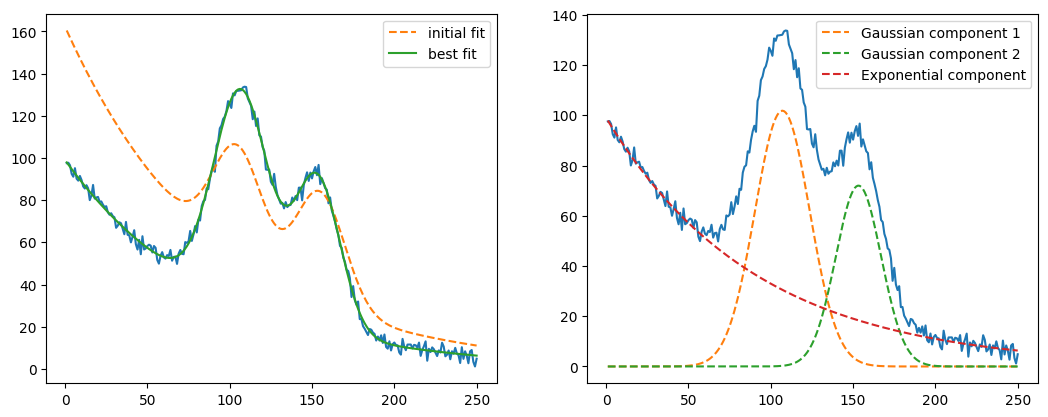

In [77]:
# <examples/doc_builtinmodels_nistgauss.py>
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import ExponentialModel, GaussianModel

dat = np.loadtxt('NIST_Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params(center=dict(value=105, min=75, max=125),
                               sigma=dict(value=15, min=0),
                               amplitude=dict(value=2000, min=0)))

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params(center=dict(value=155, min=125, max=175),
                               sigma=dict(value=15, min=0),
                               amplitude=dict(value=2000, min=0)))

mod = gauss1 + gauss2 + exp_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(correl_mode='table'))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y)
axes[1].plot(x, comps['g1_'], '--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], '--', label='Gaussian component 2')
axes[1].plot(x, comps['exp_'], '--', label='Exponential component')
axes[1].legend()

plt.show()

# <end examples/doc_builtinmodels_nistgauss.py>